# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('Wholesale_Data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [24]:
# checking info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [25]:
# checking for null values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [26]:
# checking data types
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

No null/missing values and all the data types are consistent.

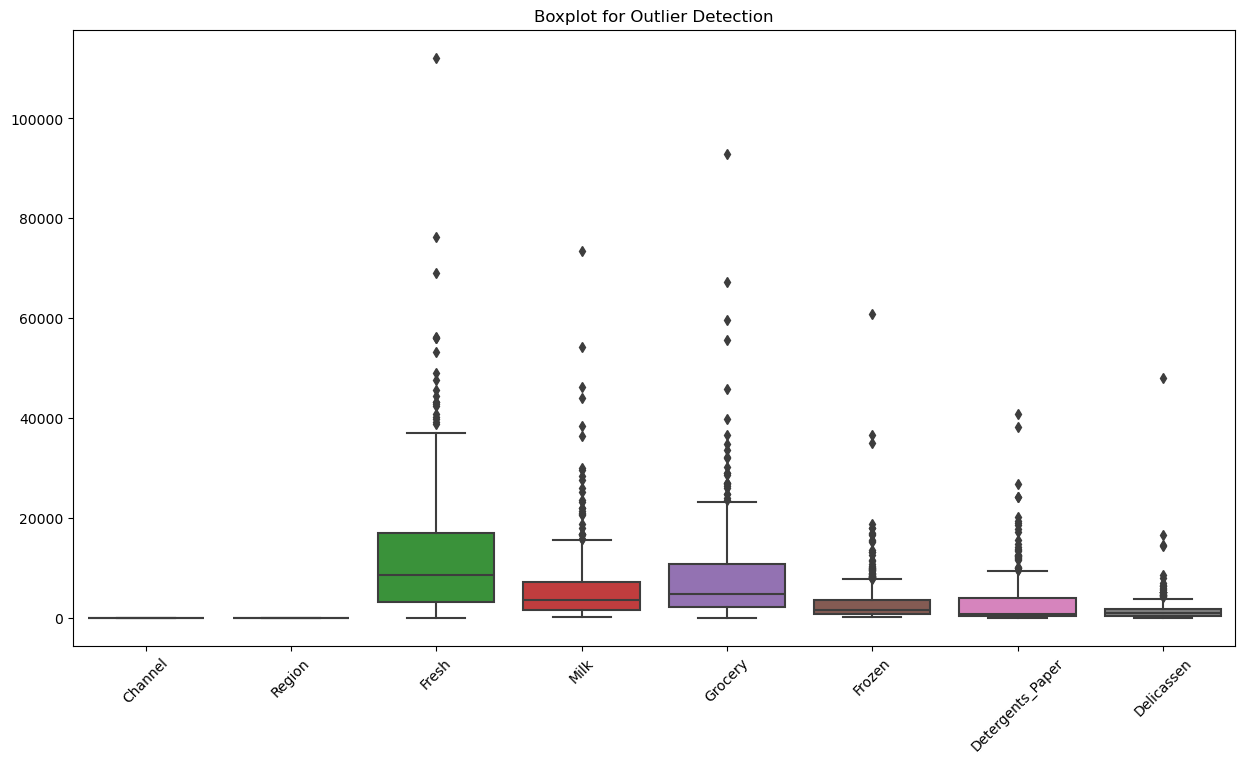

In [29]:
# visualization for outlier detection

# boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

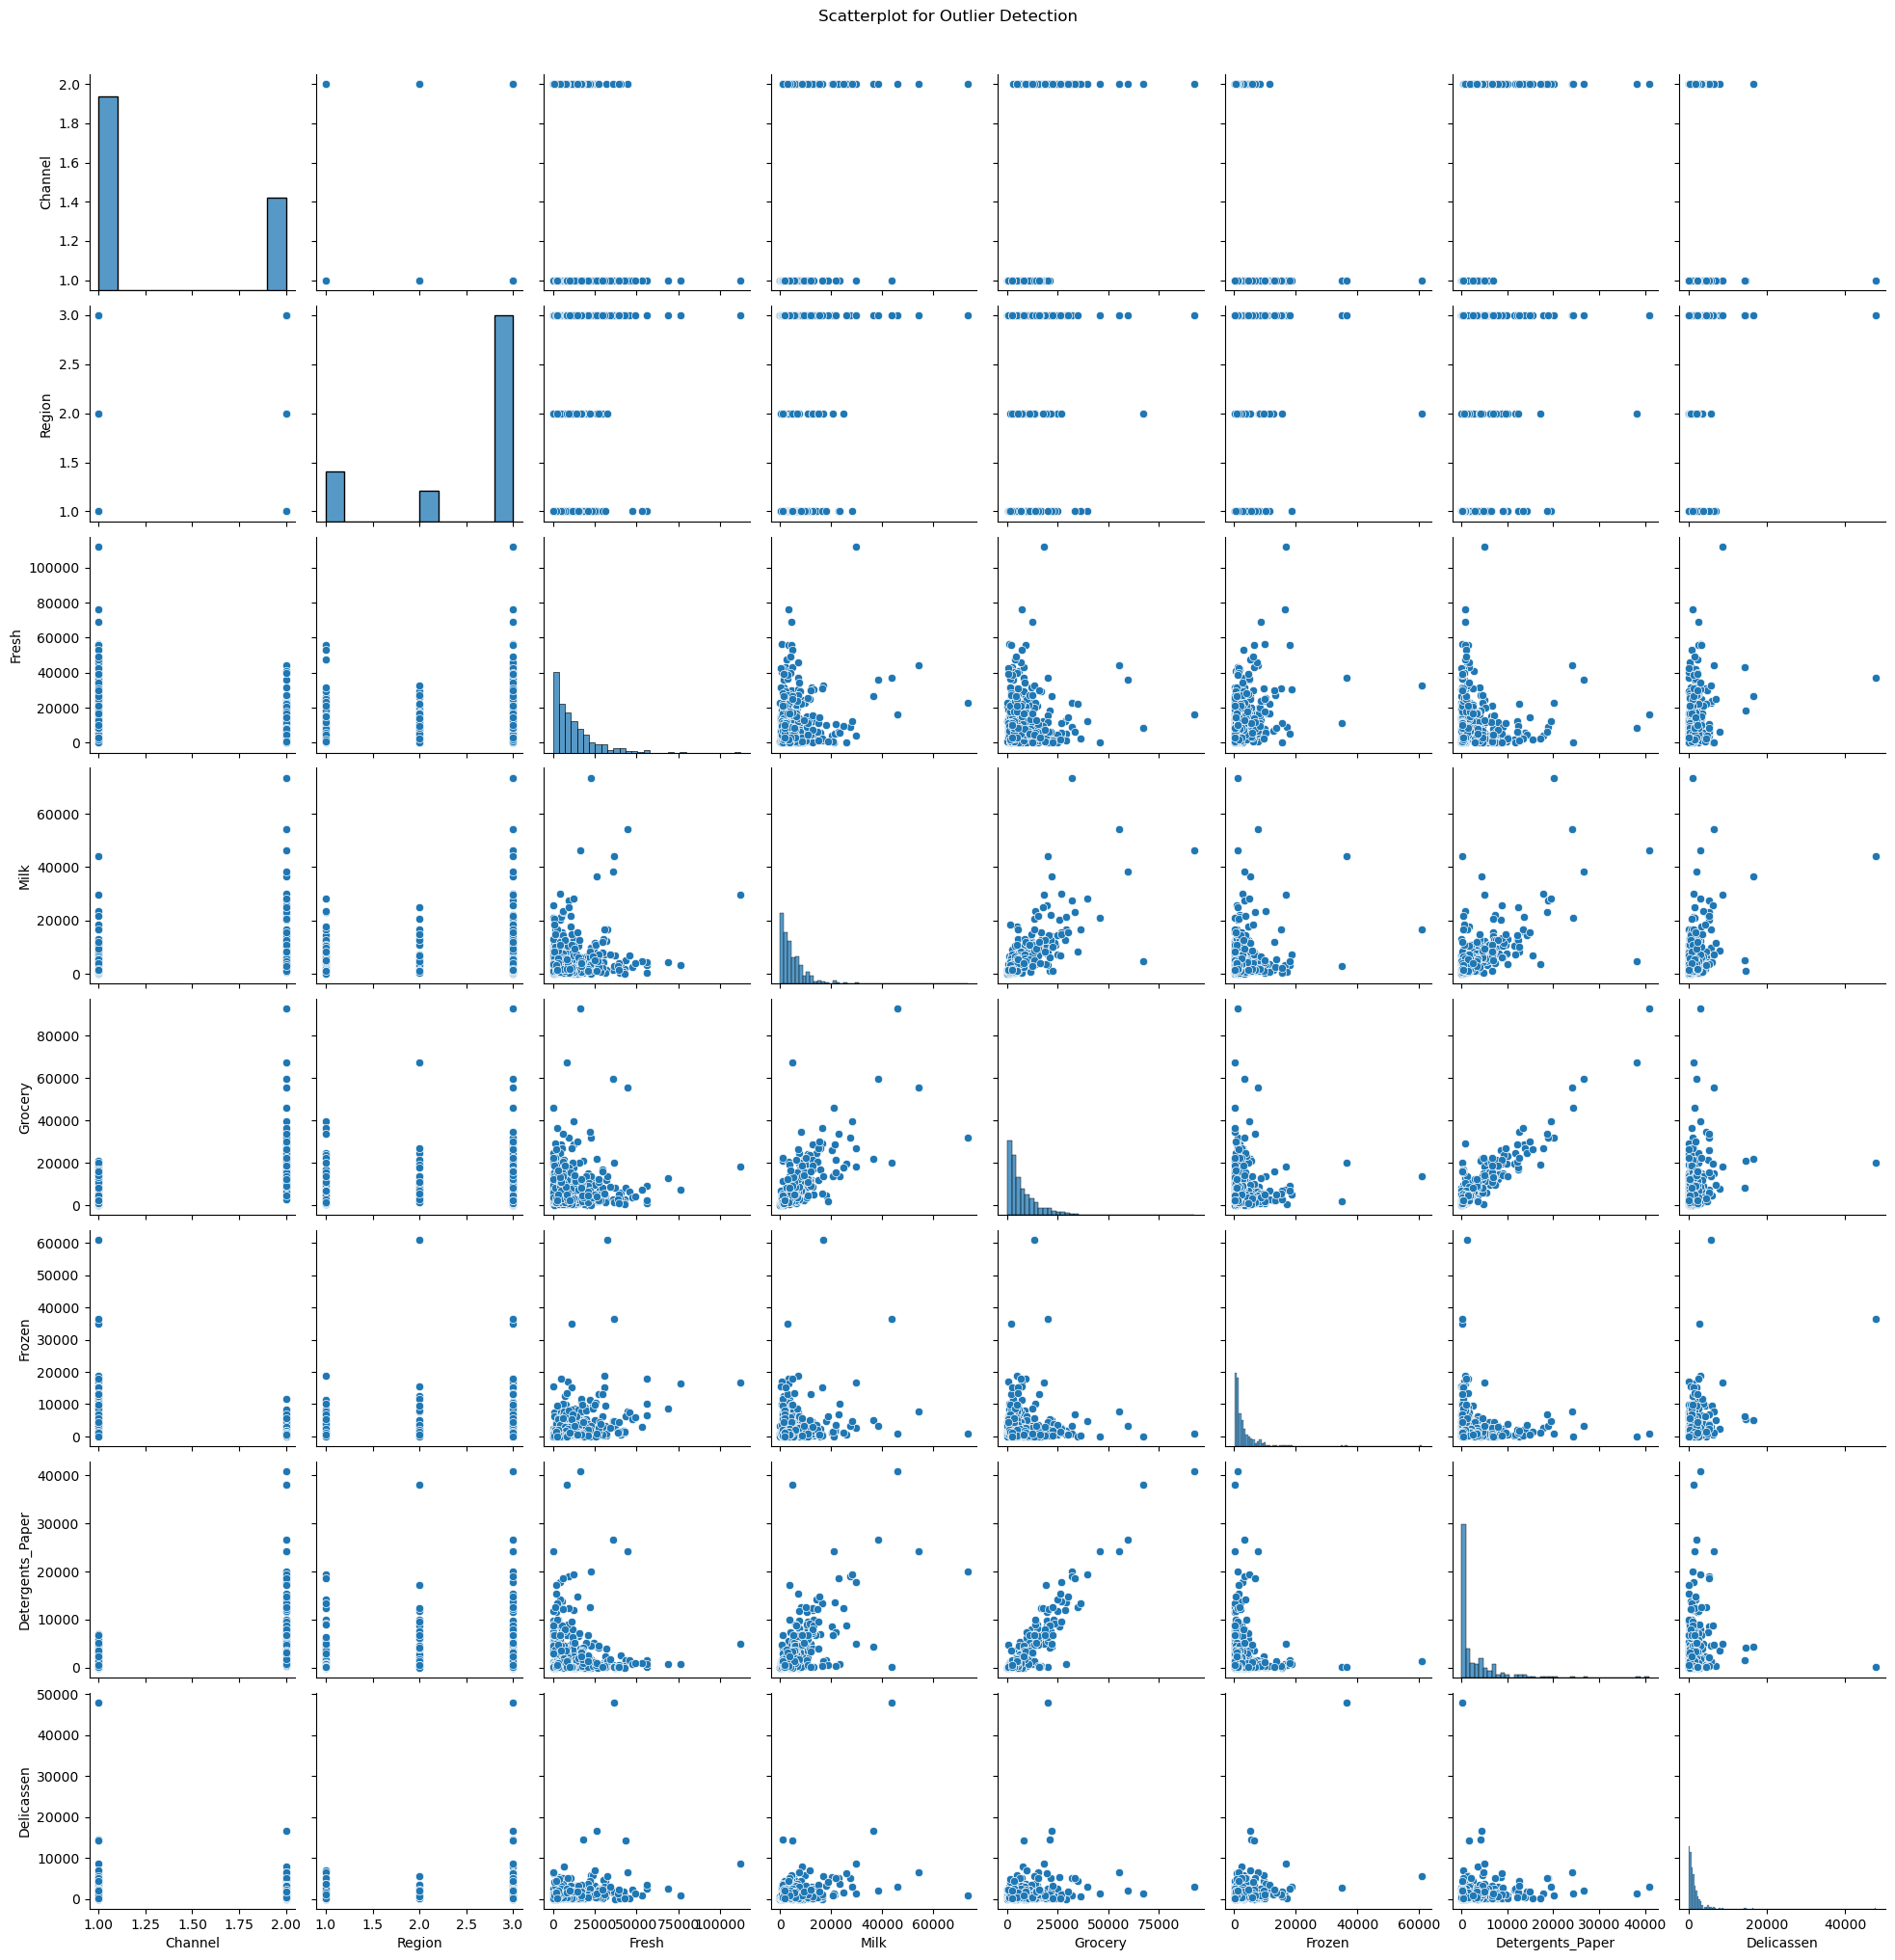

In [30]:
# scatterplot

sns.pairplot(df)
plt.suptitle("Scatterplot for Outlier Detection", y=1.02)
plt.show()

In [36]:
# outlier handling
for column in df.select_dtypes(include=['int64']):
    lower_bound = df[column].quantile(0.05)
    upper_bound = df[column].quantile(0.95)
    new_df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

new_df

C:\Users\Natan\AppData\Local\Temp\ipykernel_25668\4127010284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.0,9656.0,7561.00,214.00,2674.0,1338.00
1,2,3,7057.0,9810.0,9568.00,1762.00,3293.0,1776.00
2,2,3,6353.0,8808.0,7684.00,2405.00,3516.0,4485.40
3,1,3,13265.0,1196.0,4221.00,6404.00,507.0,1788.00
4,2,3,22615.0,5410.0,7198.00,3915.00,1777.0,4485.40
...,...,...,...,...,...,...,...,...
435,1,3,29703.0,12051.0,16027.00,9930.75,182.0,2204.00
436,1,3,36818.5,1431.0,851.45,4510.00,93.0,2346.00
437,2,3,14531.0,15488.0,24033.50,437.00,12043.2,1867.00
438,1,3,10290.0,1981.0,2232.00,1038.00,168.0,2125.00


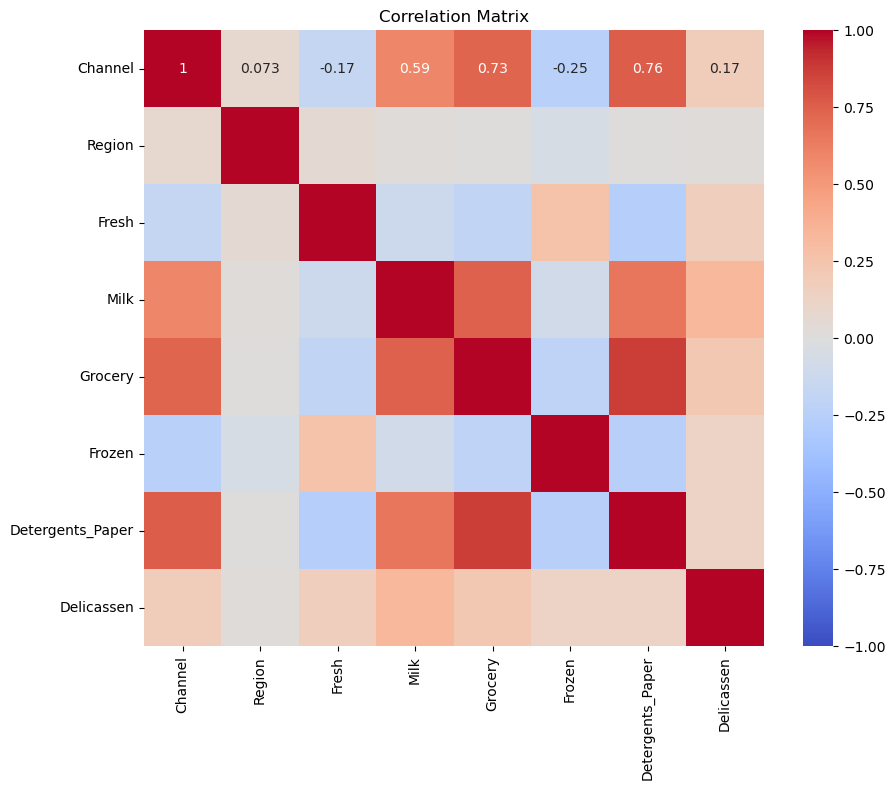

In [38]:
# correlation analysis

correlation_matrix = new_df.corr()

# plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

We can see from the correlation matrix that several features are highly correlated, such as: Grocery and Milk, Milk and Detergents_Paper, and Grocery and Detergents_Paper.

In [64]:
# selecting relevant features
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
selected_data = new_df[features]

# data transformation (standardization)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(selected_data)

Explained Variance Ratio by PCA Components:  [0.45544692 0.23173386 0.12515886 0.11617105 0.05326595]


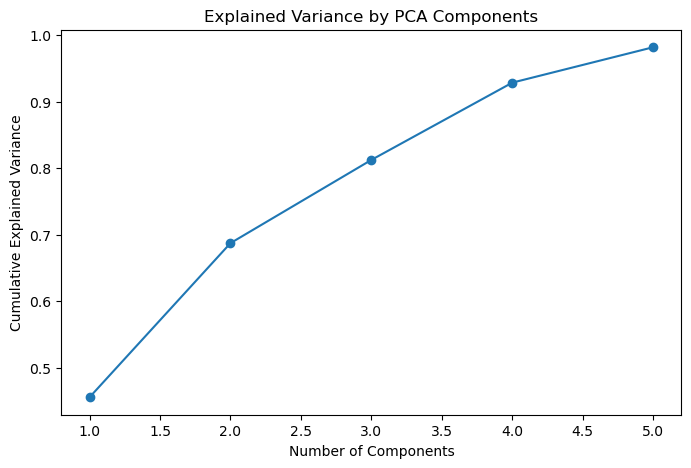

In [68]:
# feature selection (PCA)
pca = PCA(n_components=5)
pca_data = pca.fit_transform(standardized_data)

# explained variance by component
explained_variance = pca.explained_variance_ratio_
print('Explained Variance Ratio by PCA Components: ', explained_variance)

# plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()

# renaming data
final_data = pca_data

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

All data preprocessing was completed in part 1

C:\Users\Natan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Natan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Natan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Natan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

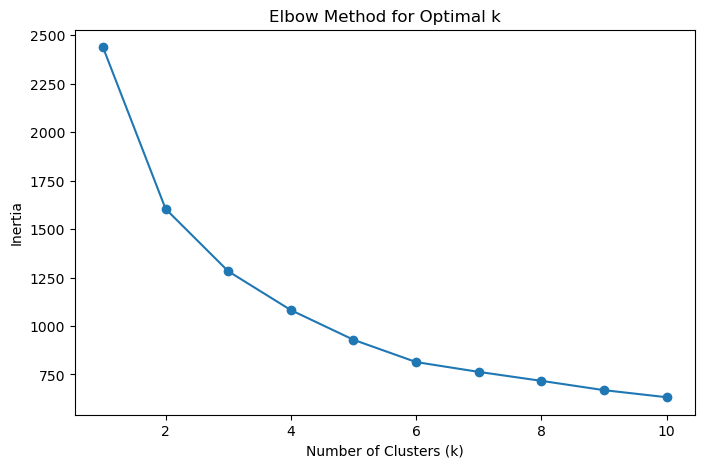

In [69]:
# determining optimal number of clusters using elbow method
from sklearn.cluster import KMeans

# calculating inertia for a range of cluster numbers
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_data)
    inertia.append(kmeans.inertia_)
    
# plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [84]:
# running kmeans with optimal number of clusters
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, tol=1e-4, random_state=42, max_iter=100) # tol (tolerance) parameter for this to be ran until convergence is reached
kmeans.fit(final_data)

# get cluster assignments
final_data_df = pd.DataFrame(final_data, columns=[f'PC{i+1}' for i in range(final_data.shape[1])])
final_data_df['Cluster'] = kmeans.labels_

C:\Users\Natan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Natan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


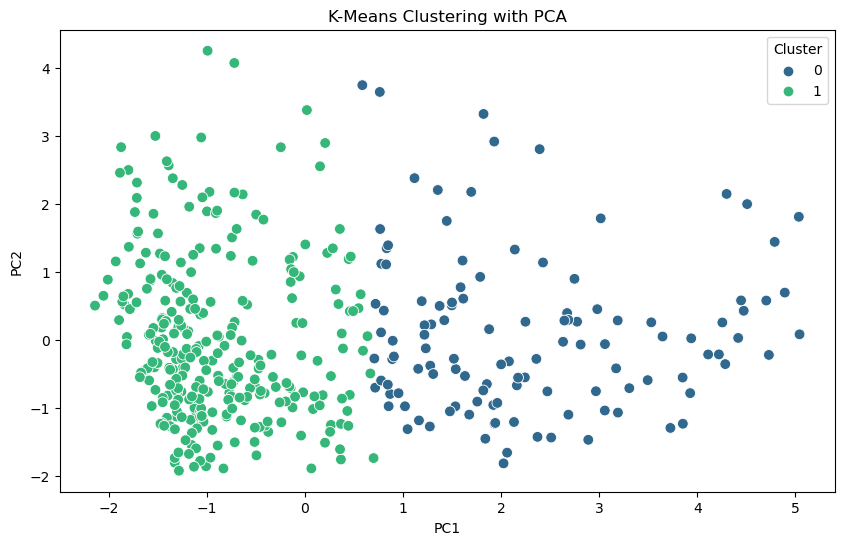

In [85]:
# reducing to 2 principal components for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(final_data)

# creating a data frame for plotting
plot_data = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
plot_data['Cluster'] = kmeans.labels_

# plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=plot_data, palette='viridis', s=60)
plt.title('K-Means Clustering with PCA')
plt.show()

In [86]:
# add cluster assignments to the original data
new_df['Cluster'] = kmeans.labels_

# Calculate mean values of features per cluster
cluster_means = new_df.groupby('Cluster')[features].mean()
print("Cluster Centers (mean values):\n", cluster_means)

Cluster Centers (mean values):
                 Fresh         Milk       Grocery       Frozen  \
Cluster                                                         
0         7031.159322  9580.872881  14645.800847  1552.728814   
1        11978.567905  2844.303209   3574.844257  2814.617399   

         Detergents_Paper   Delicassen  
Cluster                                 
0             6147.544068  1636.067797  
1              807.859459  1028.480068  


C:\Users\Natan\AppData\Local\Temp\ipykernel_25668\4071999458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = kmeans.labels_


We can see from the cluster centers that Cluster 0 is likely associated with high spenders in grocery, milk, fresh, and detergents areas and lower spending on delicassen and frozen products. Cluster 1 can be associated with high fresh, moderate frozen and low spending for every other department. 

From a business perspective this could represent a that Cluster 0 represents regular grocery suppliers, while Cluster 1 is more specialized in fresh and frozen products.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

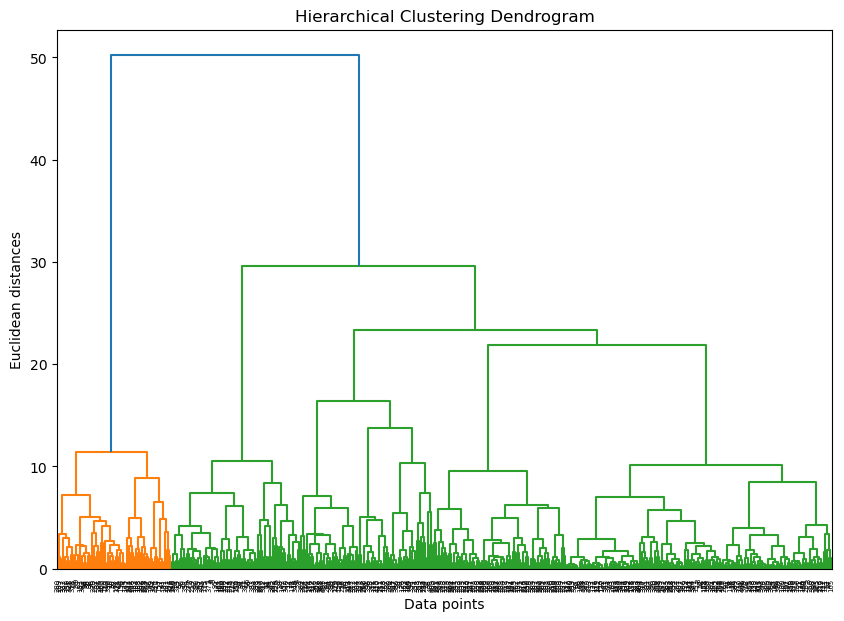

In [109]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

# creating linkage matrix
Z = linkage(standardized_data, method='ward')

# plotting dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Euclidean distances")
plt.show()

In [123]:
# determining the optimal number of clusters
distance_threshold = 20  
optimal_k = len(set(fcluster(Z, t=distance_threshold, criterion='distance')))

# fitting heirarchical clustering model with agglomerative clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
cluster_labels = hierarchical_clustering.fit_predict(standardized_data)

# assigning clusters to the original dataset
new_df['Cluster'] = cluster_labels

C:\Users\Natan\AppData\Local\Temp\ipykernel_25668\3804798699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = cluster_labels


In [124]:
new_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669.0,9656.0,7561.00,214.00,2674.0,1338.00,2
1,2,3,7057.0,9810.0,9568.00,1762.00,3293.0,1776.00,2
2,2,3,6353.0,8808.0,7684.00,2405.00,3516.0,4485.40,2
3,1,3,13265.0,1196.0,4221.00,6404.00,507.0,1788.00,3
4,2,3,22615.0,5410.0,7198.00,3915.00,1777.0,4485.40,2
...,...,...,...,...,...,...,...,...,...
435,1,3,29703.0,12051.0,16027.00,9930.75,182.0,2204.00,0
436,1,3,36818.5,1431.0,851.45,4510.00,93.0,2346.00,0
437,2,3,14531.0,15488.0,24033.50,437.00,12043.2,1867.00,1
438,1,3,10290.0,1981.0,2232.00,1038.00,168.0,2125.00,3


In [125]:
new_df['Cluster'].value_counts()

3    142
0     71
4     71
2     69
1     61
Name: Cluster, dtype: int64

In [132]:
new_df[new_df['Cluster']==0].head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
17,1,3,5876.0,6157.0,2933.0,839.0,370.0,4478.0,0
22,1,3,31276.0,1917.0,4469.0,9408.0,2381.0,4334.0,0
29,1,3,36818.5,2100.0,2609.0,1200.0,1107.0,823.0,0
30,1,3,18815.0,3610.0,11107.0,1148.0,2134.0,2963.0,0
33,1,3,29729.0,4786.0,7326.0,6130.0,361.0,1083.0,0


In [133]:
new_df[new_df['Cluster']==1].head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
9,2,3,6006.0,11093.0,18881.0,1159.00,7425.0,2098.0,1
16,2,3,1020.0,8816.0,12121.0,136.85,4508.0,1080.0,1
28,2,3,4113.0,16843.4,24033.5,1158.00,8604.0,4485.4,1
37,2,3,15168.0,10556.0,12477.0,1920.00,6506.0,714.0,1
38,2,3,4591.0,15729.0,16709.0,136.85,6956.0,433.0,1


In [134]:
new_df[new_df['Cluster']==2].head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,2
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,2
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,4485.4,2
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,4485.4,2
5,2,3,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,2


In [135]:
new_df[new_df['Cluster']==3].head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,3
8,1,3,5963.0,3648.0,6192.0,425.0,1716.0,750.0,3
15,1,3,10253.0,1114.0,3821.0,397.0,964.0,412.0,3
19,1,3,7780.0,2495.0,9464.0,669.0,2518.0,501.0,3
21,1,3,5567.0,871.0,2010.0,3383.0,375.0,569.0,3


In [136]:
new_df[new_df['Cluster']==4].head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
198,1,1,11686.0,2154.0,6824.0,3527.0,592.0,697.00,4
199,1,1,9670.0,2280.0,2112.0,520.0,402.0,347.00,4
203,1,1,583.0,685.0,2216.0,469.0,954.0,63.95,4
204,1,1,1956.0,891.0,5226.0,1383.0,63.7,1328.00,4
206,1,1,6373.0,780.0,950.0,878.0,288.0,285.00,4


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Explained Variance Ratio by PCA Components:  [0.44938416 0.15574093 0.1140568  0.0886197  0.0793447 ]


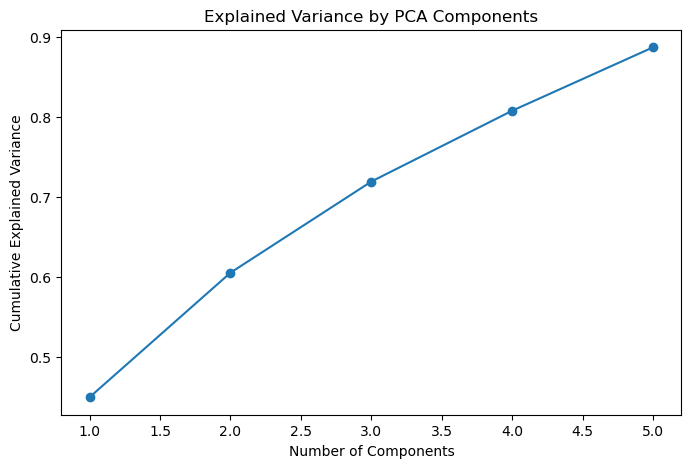

In [98]:
# preprocess the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(new_df)

# performing pca again (already did pca during data cleaning)
pca = PCA(n_components=5)
pca_data = pca.fit_transform(standardized_data)

# explained variance by component
explained_variance = pca.explained_variance_ratio_
print('Explained Variance Ratio by PCA Components: ', explained_variance)

# plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()

In [137]:
# investigate the loadings
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=new_df.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
loadings_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
PC1,0.412039,0.017359,-0.149914,0.403796,0.466528,-0.150460,0.463712,0.106728,0.421534
PC2,0.033510,0.075279,0.546234,0.229787,0.077228,0.494831,-0.039389,0.618574,-0.083845
PC3,-0.090684,-0.947364,-0.140671,0.055834,0.036703,0.258578,0.020230,0.020108,0.048470
PC4,0.040906,-0.163256,-0.165715,0.012091,-0.065004,-0.649643,-0.097103,0.637954,-0.318419
PC5,-0.125526,0.256320,-0.790774,0.090743,-0.053823,0.443783,-0.060292,0.282216,-0.043172


We can see here that: 
- PC1 has a positive loading on Fresh, Frozen, Detergrnts_Paper and Delicassen, with a negative loading on Milk.
- PC2 Positive Loadings: Grocery, Frozen, Detergents, and Delicasssen.
- PC3 Negative Loading: Milk
- PC4 Positive Loading: Delicassen 
- PC5 Positive Loading: Frozen and Delicassen

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- In the clusters formed by K-Means, Cluster 0 is likely associated with high spenders in grocery, milk, fresh, and detergents areas and lower spending on delicassen and frozen products. Cluster 1 can be associated with high fresh, moderate frozen and low spending for every other department.
- From a business perspective, this could mean that Cluster 0 is a regular grocer, while Cluster 1 specializes within fresh and frozen.
- In the five clusters made by hierarchical clustering, we can see cluster 0 has moderate values across indicating regular shoppers, cluster 1 has higher values in grocery frozen and detergents, cluster 2 is fairly balanced, cluster 3 has high vales in milk and detergents, and cluster 4 has higher frozen and detergents.
### The PCA:
- PC1 has a positive loading on Fresh, Frozen, Detergrnts_Paper and Delicassen, with a negative loading on Milk.
- PC2 Positive Loadings: Grocery, Frozen, Detergents, and Delicasssen.
- PC3 Negative Loading: Milk
- PC4 Positive Loading: Delicassen
- PC5 Positive Loading: Frozen and Delicassen


With this analysis, we are easily able to segment customers into certain groups